# Smoking and Drinking Dataset with body signal

## Summary of the Dataset

No. of instances(rows) in dataset = **9_91_346**

---
This dataset is collected from National Health Insurance Service in Korea. All personal information and sensitive data were excluded. \
The purpose of this dataset is to:

- Analysis of body signal
- Classification of smoker or drinker



---
- sex : male, female
- age : round up to 5 years
- height : round up to 5 cm[cm]
- weight	: [kg]
- waistline : [cm]
- sight_left : eyesight(left)
- sight_right : eyesight(right)
- hear_left : hearing left, 1(normal), 2(abnormal)
- hear_right : hearing right, 1(normal), 2(abnormal)
- SBP : Systolic blood pressure[mmHg]
- DBP : Diastolic blood pressure[mmHg]
- BLDS : BLDS or FSG(fasting blood glucose)[mg/dL]
- tot_chole : total cholesterol[mg/dL]
- HDL_chole : HDL cholesterol[mg/dL]
- LDL_chole : LDL cholesterol[mg/dL]
- triglyceride : triglyceride[mg/dL]
- hemoglobin : hemoglobin[g/dL]
- urine_protein : protein in urine, 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4)
- serum_creatinine : serum(blood) creatinine[mg/dL]
- SGOT_AST : SGOT(Glutamate-oxaloacetate transaminase) AST(Aspartate transaminase)- [IU/L]
- SGOT_ALT : ALT(Alanine transaminase)[IU/L]
- gamma_GTP : y-glutamyl transpeptidase[IU/L]
- SMK_stat_type_cd : Smoking state, 1(never), 2(used to smoke but quit), 3(still smoke)
- **`DRK_YN`** : Drinker or Not
---

## EDA

This is the database of 991346 persons' body signal data with 24 columns.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
%cd /content/gdrive/My Drive/Datasets/

/content/gdrive/My Drive/Datasets


In [ ]:
!pwd

/content/gdrive/My Drive/Datasets


In [ ]:
# import os
import pandas as pd
# Setting pandas options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 70)
pd.set_option('display.max_rows', 50)
pd.set_option('display.min_rows', 20)
pd.set_option('display.precision', 3)
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('smoking_drinking_dataset.csv')
#making a copy of the dataframe
ddf = df.copy()

In [ ]:
ddf.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0000,1.0000,1.0000,1.0000,1.0000,120.0000,80.0000,99.0000,193.0000,48.0000,126.0000,92.0000,17.1000,1.0000,1.0000,21.0000,35.0000,40.0000,1.0000,Y
1,Male,30,180,80,89.0000,0.9000,1.2000,1.0000,1.0000,130.0000,82.0000,106.0000,228.0000,55.0000,148.0000,121.0000,15.8000,1.0000,0.9000,20.0000,36.0000,27.0000,3.0000,N
2,Male,40,165,75,91.0000,1.2000,1.5000,1.0000,1.0000,120.0000,70.0000,98.0000,136.0000,41.0000,74.0000,104.0000,15.8000,1.0000,0.9000,47.0000,32.0000,68.0000,1.0000,N
3,Male,50,175,80,91.0000,1.5000,1.2000,1.0000,1.0000,145.0000,87.0000,95.0000,201.0000,76.0000,104.0000,106.0000,17.6000,1.0000,1.1000,29.0000,34.0000,18.0000,1.0000,N
4,Male,50,165,60,80.0000,1.0000,1.2000,1.0000,1.0000,138.0000,82.0000,101.0000,199.0000,61.0000,117.0000,104.0000,13.8000,1.0000,0.8000,19.0000,12.0000,25.0000,1.0000,N


In [ ]:
ddf.sample(10)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
901444,Female,65,155,70,83.0000,0.7000,0.8000,1.0000,1.0000,122.0000,80.0000,124.0000,213.0000,53.0000,111.0000,245.0000,11.3000,1.0000,0.9000,20.0000,15.0000,19.0000,1.0000,N
64321,Female,50,160,70,81.0000,0.7000,0.8000,1.0000,1.0000,108.0000,63.0000,91.0000,189.0000,55.0000,105.0000,145.0000,10.0000,1.0000,0.5000,41.0000,49.0000,22.0000,1.0000,N
614585,Male,50,160,50,71.0000,1.0000,0.9000,1.0000,1.0000,95.0000,65.0000,95.0000,167.0000,45.0000,110.0000,58.0000,14.1000,1.0000,1.1000,20.0000,21.0000,16.0000,2.0000,Y
545030,Female,55,160,65,79.0000,0.9000,0.6000,1.0000,1.0000,124.0000,78.0000,90.0000,222.0000,65.0000,138.0000,94.0000,12.8000,1.0000,0.5000,27.0000,26.0000,34.0000,1.0000,N
134799,Female,40,160,55,75.0000,1.5000,1.2000,1.0000,1.0000,120.0000,70.0000,102.0000,158.0000,80.0000,63.0000,71.0000,13.6000,1.0000,0.7000,25.0000,17.0000,12.0000,1.0000,N
710411,Female,35,160,50,60.0000,0.4000,0.7000,1.0000,1.0000,111.0000,80.0000,94.0000,225.0000,82.0000,136.0000,35.0000,14.0000,1.0000,0.8000,22.0000,21.0000,44.0000,1.0000,Y
340123,Male,50,170,80,88.2000,1.0000,1.0000,1.0000,1.0000,126.0000,88.0000,120.0000,216.0000,62.0000,137.0000,86.0000,13.1000,1.0000,0.8000,29.0000,21.0000,199.0000,2.0000,Y
783746,Male,45,170,80,98.0000,1.2000,1.2000,1.0000,1.0000,140.0000,90.0000,122.0000,207.0000,57.0000,101.0000,242.0000,15.6000,1.0000,0.8000,21.0000,21.0000,36.0000,2.0000,Y
848467,Female,50,155,60,72.0000,1.0000,0.8000,1.0000,1.0000,116.0000,62.0000,86.0000,162.0000,65.0000,88.0000,47.0000,14.0000,1.0000,0.8000,15.0000,9.0000,8.0000,1.0000,N
419291,Male,30,165,75,86.0000,1.2000,1.2000,1.0000,1.0000,132.0000,72.0000,105.0000,200.0000,44.0000,125.0000,153.0000,17.0000,1.0000,1.0000,74.0000,171.0000,44.0000,1.0000,N


In [ ]:
ddf = ddf.rename({'SMK_stat_type_cd':'smoking_history','DRK_YN':'drinking_history'}, axis = 'columns')

In [ ]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [ ]:
ddf.shape

(991346, 24)

In [ ]:
ddf.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
smoking_history     0
drinking_history    0
dtype: int64

In [ ]:
ddf.describe().T

,count,mean,std,min,25%,50%,75%,max
age,991346.0000,47.6145,14.1813,20.0000,35.0000,45.0000,60.0000,85.0000
height,991346.0000,162.2406,9.2830,130.0000,155.0000,160.0000,170.0000,190.0000
weight,991346.0000,63.2841,12.5142,25.0000,55.0000,60.0000,70.0000,140.0000
waistline,991346.0000,81.2334,11.8503,8.0000,74.1000,81.0000,87.8000,999.0000
sight_left,991346.0000,0.9808,0.6059,0.1000,0.7000,1.0000,1.2000,9.9000
sight_right,991346.0000,0.9784,0.6048,0.1000,0.7000,1.0000,1.2000,9.9000
hear_left,991346.0000,1.0315,0.1747,1.0000,1.0000,1.0000,1.0000,2.0000
hear_right,991346.0000,1.0305,0.1719,1.0000,1.0000,1.0000,1.0000,2.0000
SBP,991346.0000,122.4325,14.5431,67.0000,112.0000,120.0000,131.0000,273.0000
DBP,991346.0000,76.0526,9.8894,32.0000,70.0000,76.0000,82.0000,185.0000


In [ ]:
ddf.describe(include='O').T

,count,unique,top,freq
sex,991346,2,Male,526415
drinking_history,991346,2,N,495858


### Data Encoding

In [ ]:
# Apply label encoding(converting to numerical) to each categorical column

ddf['sex'] = ddf['sex'].map({'Male':1,'Female':2})
ddf['drinking_history'] = ddf['drinking_history']. map({'Y':1,'N':0})

In [ ]:
# @title _ {display-mode: "form"}

# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()


In [ ]:
ddf.sample(5)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,smoking_history,drinking_history
401070,1,30,165,65,76.0000,1.5000,1.5000,1.0000,1.0000,100.0000,61.0000,101.0000,231.0000,49.0000,153.0000,142.0000,14.8000,1.0000,1.1000,14.0000,9.0000,15.0000,3.0000,0
460091,2,45,155,60,74.0000,0.8000,1.0000,1.0000,1.0000,120.0000,72.0000,108.0000,267.0000,93.0000,160.0000,67.0000,11.1000,1.0000,1.0000,26.0000,15.0000,16.0000,1.0000,1
944181,1,50,170,75,94.0000,1.0000,0.8000,2.0000,1.0000,160.0000,92.0000,332.0000,164.0000,53.0000,94.0000,82.0000,14.1000,1.0000,0.8000,65.0000,24.0000,476.0000,1.0000,1
294749,1,65,165,75,88.0000,0.6000,0.7000,1.0000,1.0000,133.0000,89.0000,123.0000,239.0000,49.0000,176.0000,66.0000,16.1000,1.0000,1.0000,22.0000,23.0000,33.0000,1.0000,0
832670,1,30,170,65,73.0000,1.2000,1.0000,1.0000,1.0000,100.0000,62.0000,90.0000,170.0000,69.0000,88.0000,64.0000,15.3000,1.0000,1.1000,19.0000,13.0000,17.0000,3.0000,1


In [ ]:
X = ddf.drop(['drinking_history'], axis=1) #Features

y = ddf['drinking_history']  #Target variable

### Plots

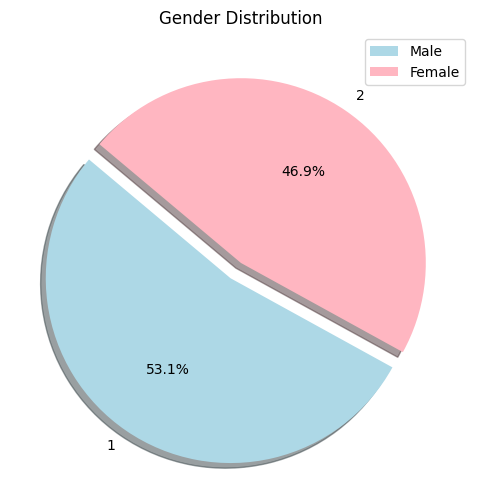

In [ ]:
# Data preparation
gender_counts = ddf['sex'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values
colors = ['lightblue', 'lightpink']
explode = (0.1, 0)  # explode the 1st slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Gender Distribution')

# Adding legend
legend_labels = ['Male', 'Female']
plt.legend(legend_labels, loc='upper right')

plt.show()

In [ ]:
import seaborn as sns

# Define data for drinkers and non-drinkers
drinkers_age = ddf[ddf['drinking_history'] == 1]['age']
non_drinkers_age = ddf[ddf['drinking_history'] == 0]['age']

# Set style and colors
sns.set(style="whitegrid")
colors = ['skyblue', 'lightgreen']

# Create box plots for age distribution for drinkers and non-drinkers
plt.figure(figsize=(8, 6))
sns.boxplot(x='drinking_history', y='age', data=ddf, hue='drinking_history', palette=colors, width=0.5, showfliers=False, legend=False)

# Highlight quartiles, median, and outliers for each class
sns.swarmplot(x='drinking_history', y='age', data=ddf, color='black', size=6, alpha=0.7)

plt.title('Age Distribution for Drinkers and Non-Drinkers')
plt.xlabel('Drinker (drinking_history)')
plt.ylabel('Age')
plt.legend(loc='upper right')
plt.show()

In [ ]:
import seaborn as sns

# Select numerical features for pair plot
numerical_features = ddf.select_dtypes(include=['float64', 'int64'])

# Add 'drinking_history' column for color differentiation
numerical_features['drinking_history'] = ddf['drinking_history']

plt.figure(figsize=(12, 10))
sns.pairplot(numerical_features, hue='drinking_history', diag_kind='kde')
plt.suptitle('Pair Plot for Numerical Features', y=1.02)
plt.show()


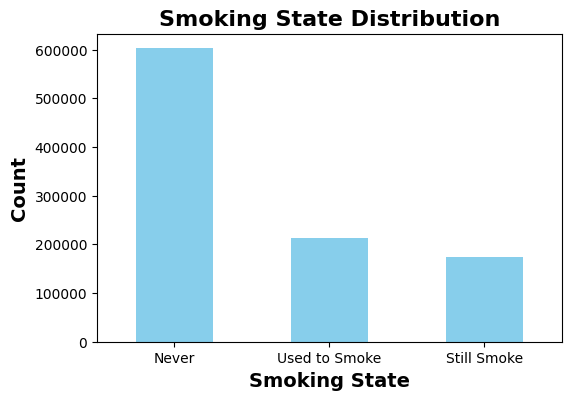

In [ ]:
smoking_counts = ddf['smoking_history'].value_counts()

plt.figure(figsize=(6, 4))
smoking_counts.plot(kind='bar', color='skyblue')

plt.title('Smoking State Distribution', weight='bold', fontsize=16)

plt.xlabel('Smoking State', weight='bold', fontsize=14)
plt.ylabel('Count', weight='bold', fontsize=14)

# Labeling the x-axis with respective values
plt.xticks(range(len(smoking_counts.index)), ['Never', 'Used to Smoke', 'Still Smoke'], rotation=0)

plt.show()

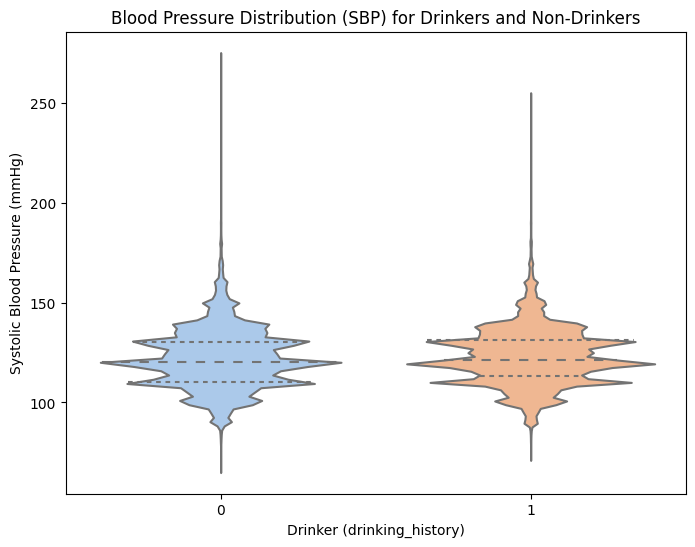

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='drinking_history', y='SBP', data=ddf, inner='quartile', palette='pastel')
plt.title('Blood Pressure Distribution (SBP) for Drinkers and Non-Drinkers')
plt.xlabel('Drinker (drinking_history)')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.show()

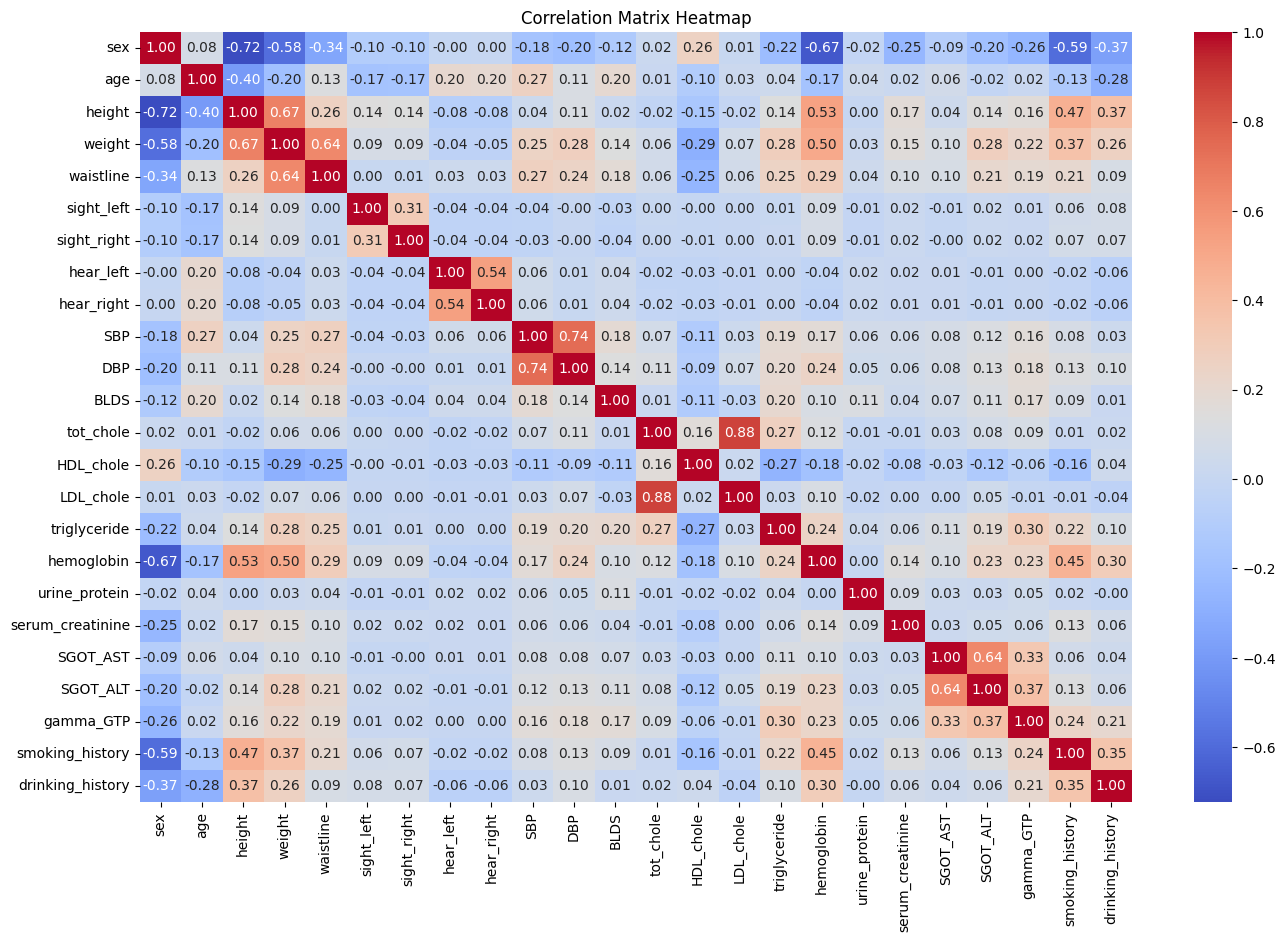

In [ ]:
plt.figure(figsize=(16, 10))
correlation_matrix = ddf.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

From the correlation matrix, we could observe that columns **SBP** and **DBP** have high positive correlation. So we could drop **DBP**.

In [ ]:
X = ddf.drop(['DBP'], axis=1)

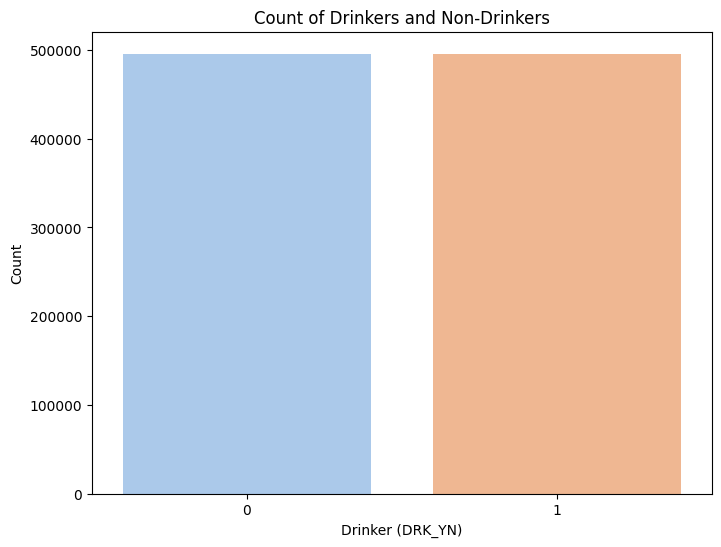

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='drinking_history', data=ddf, palette='pastel')
plt.title('Count of Drinkers and Non-Drinkers')
plt.xlabel('Drinker (DRK_YN)')
plt.ylabel('Count')
plt.show()

## The Problem:

I have decided to work with the problem of classifying whether a person is drinker or not (`drinking_history`) using **logistic regression** \\

The reasons are: \\
- Logistic Regression is a simple and interpretable algorithm.
- Logistic Regression can handle large datasets efficiently and is computationally less intensive compared to some complex algorithms
- Logistic Regression includes regularization techniques (L1 and L2 regularization) that help prevent overfitting, making it adaptable to various datasets.

## Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are your training and testing sets respectively

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data (using the same mean and standard deviation as the training data)
X_test_scaled = scaler.transform(X_test)

Now, X_train_scaled and X_test_scaled contain the standardized features

## Model Building

### HyperParameter Tuning

Hyperparameters used for Logistic Regression: \


1. **`C` (Regularization Parameter)**:
   - `C` is the inverse of regularization strength.
   - Smaller values of `C` indicate stronger regularization, which can prevent overfitting by penalizing large coefficients.
   - Larger values of `C` result in weaker regularization, allowing the model to fit the training data more closely, potentially leading to overfitting if set too high.

2. **`penalty` (Regularization Type)**:
   - `penalty` determines the type of regularization used in the model.
   - `'l1'` penalty adds the absolute values of the coefficients to the cost function (Lasso regularization), encouraging sparsity in feature selection.
   - `'l2'` penalty adds the squares of the coefficients to the cost function (Ridge regularization), discouraging large coefficients.

3. **`fit_intercept`**:
   - `fit_intercept` specifies whether to calculate the intercept for this model (bias term).
   - If set to `True`, the model learns an intercept.
   - If set to `False`, the model does not learn an intercept and is forced through the origin.

4. **`solver` (Optimization Algorithm)**:
   - `solver` determines the algorithm to use in the optimization problem.
   - `'liblinear'` is suitable for small datasets and supports both L1 and L2 regularization.
   - `'newton-cg'`, `'lbfgs'`, `'sag'`, and `'saga'` are suitable for large datasets. `'saga'` supports both L1 and L2 regularization.

5. **`max_iter` (Maximum Iterations)**:
   - `max_iter` represents the maximum number of iterations taken for the solver to converge.
   - It limits the number of iterations the optimization algorithm performs before it stops, ensuring the algorithm does not run indefinitely.

6. **`random_state`**:
   - `random_state` provides a seed for the random number generator used for randomizing the logistic regression's behavior.
   - Setting a specific value ensures reproducibility in model training.

In [ ]:
# Define hyperparameters and their potential values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Regularization type (L1 or L2)
}

# Create a Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

print(best_params)

In [ ]:
# Define hyperparameters and their potential values
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
    'fit_intercept': [True, False],  # Whether to calculate the intercept
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag'],  # Solver for optimization
    'max_iter': [100, 200, 500, 1000],  # Maximum number of iterations
    'random_state': [42]
}

# Create a Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Perform Randomized Search for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=logreg, param_distributions=param_dist,
                                   n_iter=100, scoring='accuracy', cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

print(best_params)

In [ ]:
print(best_params)

{'C': 0.1, 'penalty': 'l2'}


In [ ]:
# Create a Logistic Regression model with the best hyperparameters
best_logreg = LogisticRegression(random_state=42, **best_params)
best_logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1, random_state=42)

In [ ]:
# Predict on the test set
y_pred = best_logreg.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7163312654461088


### Model Evaluation

In [ ]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72     98834
           1       0.72      0.71      0.71     99436

    accuracy                           0.72    198270
   macro avg       0.72      0.72      0.72    198270
weighted avg       0.72      0.72      0.72    198270



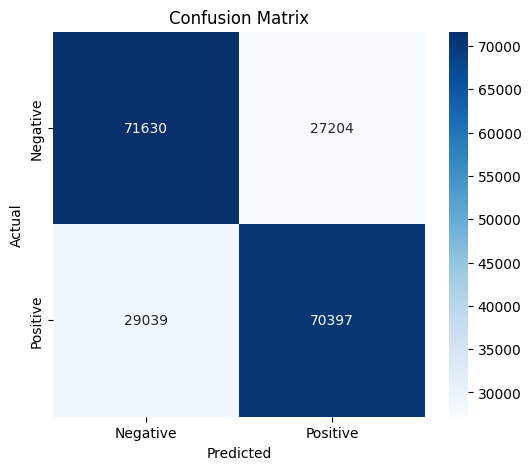

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

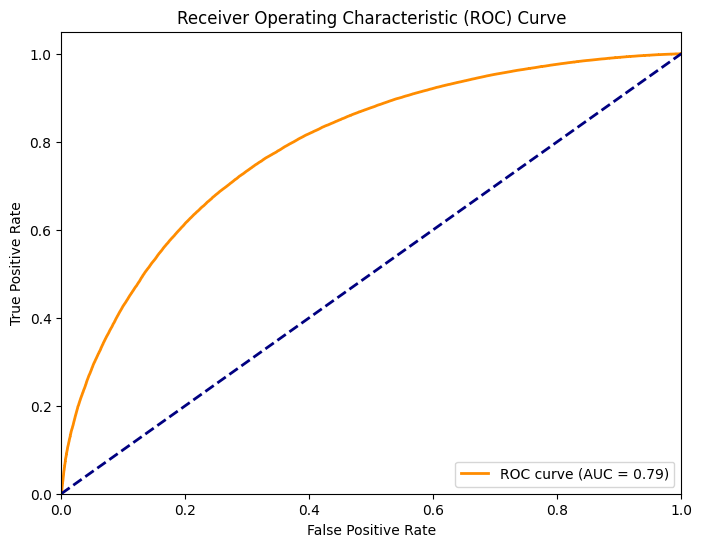

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

y_pred_prob = best_logreg.predict_proba(X_test)[:, 1]  # Probability of class 1 (positive)

# Assuming y_test and y_pred_prob are the true labels and predicted probabilities, respectively
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the Curve) score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Evaluation Metrics:

```
Accuracy: 0.71633
Precision: 0.72
Recall: 0.72
F1-score: 0.72
AUC: 0.79
```
